## Absorption Band Tail Analysis ##

This notebook summarizes the efforts to relate the width of the band tail detected in TAS/conductance to the FWHM of the absorption maximum. 

The idea is to translate the absorption maximum to a density of states and normalize by $N_{QD} \sim 10^{19}cm^{-3}$. This will give us some measure of the DOS in $eV^{-1}cm^{-3}$. Once that is done, we can calculate the occupation in $cm^{-3}$ by thinking about the overlap of this distribution with the Fermi function $f(E) = \frac{1}{1 + \text{exp}(\frac{E-E_{F}}{k_{B}T})}$.

In [1]:
import numpy as np
import lmfit as lmf
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import os
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
from scipy import integrate
from scipy.integrate import quad
%matplotlib inline

#to make fonts from plots look normal
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Calibri'
mpl.rcParams['mathtext.it'] = 'Calibri:italic'
mpl.rcParams['mathtext.bf'] = 'Calibri:bold'

font = {'family' : 'Calibri',
        'weight' : 'normal',
        'size'   : 36}
        #'sans-serif' : 'Arial Unicode MS'}
mpl.rc('font', **font)
plt.rc('font', size=36)          # controls default text sizes

#mpl.rcParams.update({'figure.autolayout': True})
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5 #set the value globally
mpl.rcParams['lines.markersize'] = 16
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
#mpl.rcParams['xtick.top'] = False
#mpl.rcParams['ytick.right'] = False


Examine the form of $f(E)$. Assume $E_{F}\sim 0.2$ eV from the center of the absorption maximum. 


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


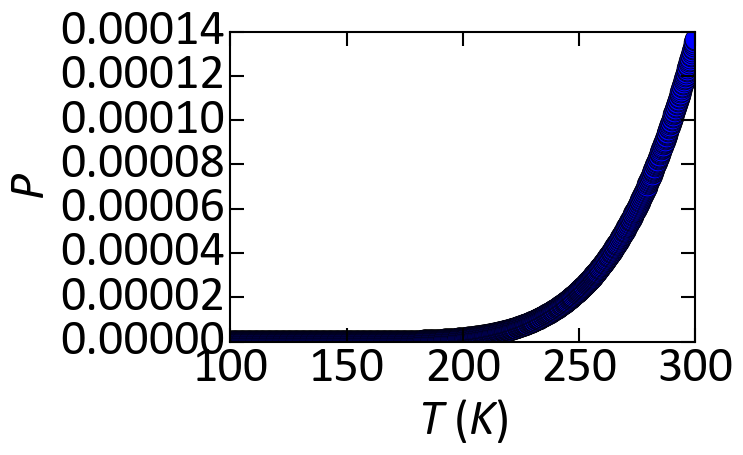

In [2]:

# input energy difference E - E_{F}
deltaE = 0.23

# input a linearly spaced array of temperatures to vary
T = np.linspace(100,300,1e3)

# constants in eV
kB = 8.617e-5

# calculate fermi function and plot
fermi = 1/(1 + np.exp(deltaE/(kB*T)))

# print(fermi)

fig,ax = plt.subplots(1,1)
ax.plot(T,fermi,'o', markersize = 15)
ax.set_xlabel("$T$ ($K$)")
ax.set_ylabel("$P$ ")
# ax.set_xscale("log") 
# ax.set_yscale("log")


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


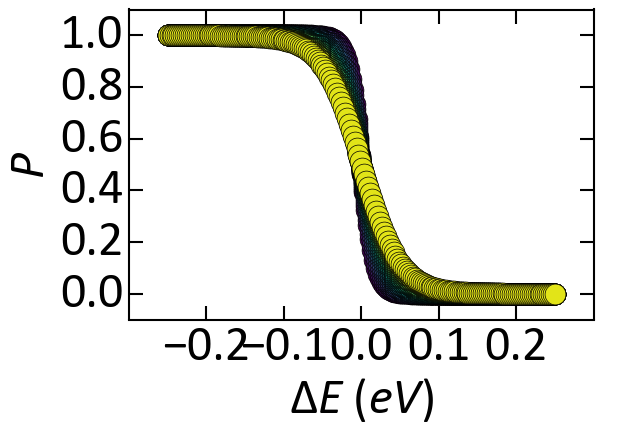

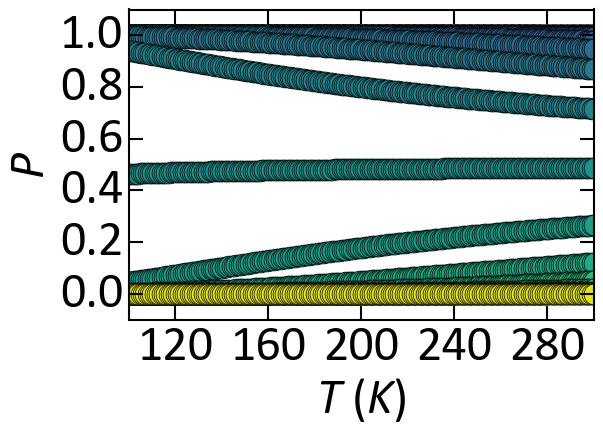

In [3]:
# try the other way around. at a constant T, try many different energy differences. see if this fits intuition better.

# make a master array for the fermi function. across 1 dimension, put different energy differences E-E_{F}
# across the other dimension, put different temperatures

fermiArray = np.zeros((200,200)) 
iMax = fermiArray.shape[0]

deltaE = np.linspace(-.25,.25,iMax)
T = np.linspace(100,300,iMax)
E_star = 0.23
starIdx = np.max(np.where(deltaE <= E_star)[0])

for e in range(0,iMax):
    for t in range(0,iMax):
        fermiArray[e,t] = 1/(1 + np.exp(deltaE[e]/(kB*T[t])))
        

# make colormap corresponding to full dat set
colSet = (cm.viridis(np.linspace(0,1,iMax)))
        
fig,ax = plt.subplots(1,1)
for t in range(0,iMax,10):
    ax.plot(deltaE,fermiArray[:,t],'o',c = tuple(colSet[t]), markersize = 15)
ax.set_xlabel("$\\Delta E$ ($eV$)")
ax.set_ylabel("$P$ ")
# ax.set_xscale("log") 
# ax.set_yscale("log")
ax.set_xlim([-.3,0.3])
ax.set_ylim([-.1,1.1])
ax.xaxis.set_major_locator(MaxNLocator(6))

fig,ax = plt.subplots(1,1)
for e in range(0,iMax,10):
        ax.plot(T,fermiArray[e,:],'o',c=tuple(colSet[e]),markersize = 15)
ax.set_xlabel("$T$ ($K$)")
ax.set_ylabel("$P$ ")
# ax.set_xscale("log") 
# ax.set_yscale("log")
# ax.set_xlim([-.3,0.3])
ax.set_ylim([-.1,1.1])
ax.xaxis.set_major_locator(MaxNLocator(6))

    
    
    
    
# print(fermiArray.shape[0])
# print(np.max(np.where(deltaE <= 0.23)[0]))
# print(deltaE[191])


To try in the AM: 

1) We know the form of the F-D distribution for the energies/temperatures described.
2) We also know the location of the mean of the VB and the FWHM from conductance measurements

$\rightarrow$ integrate the product of the a Gaussian DOS centered at $E{V}$ width and a $\sigma$ related to the band tail width (assume this is equal to the absorption FWHM initially and check with Leo in lab).

The question is: this number of order what we detect in DLCP...?


In [4]:
# calculate the total number of particles N_{QD}

# radius of QD in cm
rQD = 1.5e-7

# volume of single spherical QD
vQD = (4/3)*np.pi*(rQD**3)

# packing fraction (randomly close packed spheres)
chi = 0.64
# number of QDs
nQD = chi/vQD

# print('The number of QDs in the film is ~: {}'.format(nQD))
print('The number of QDs in the film is ~ {} cm^(-3)'.format(nQD))

nV = 8*nQD
print('The total concentration of valence band states is ~ {} cm^(-3)'.format(nV))



The number of QDs in the film is ~ 4.527073936836135e+19 cm^(-3)
The total concentration of valence band states is ~ 3.621659149468908e+20 cm^(-3)


The total integrated DOS is: 1.9627214779146202e+18 cm^(-3)


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


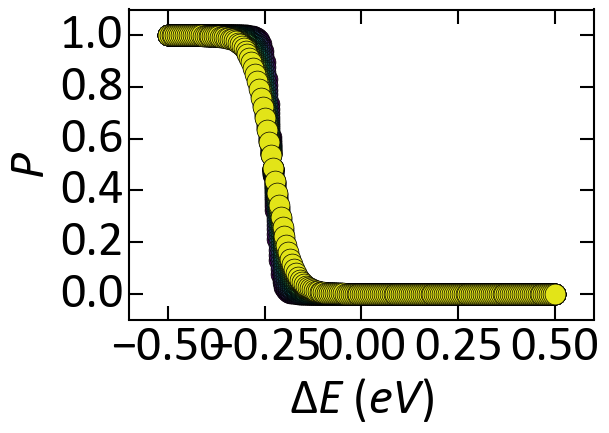

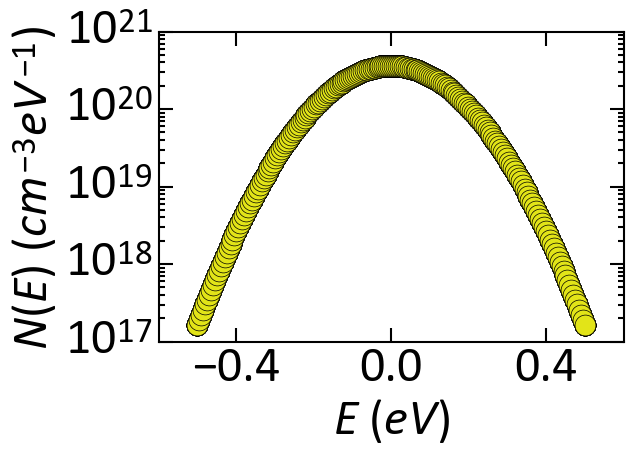

In [5]:
# array to store Fermi function at different E, T
fermiArray = np.zeros((200,200)) 
iMax = fermiArray.shape[0]

# energy ordinate
E = np.linspace(-.5,.5,iMax)

# temperature array
T = np.linspace(100,300,iMax)

# make colormap corresponding to full dat set
colSet = (cm.viridis(np.linspace(0,1,iMax)))

# input the energetic distance |E_{F} - E_{v}| = E_{A} of dielectric relaxation and find index
E_star = -0.23
starIdx = np.max(np.where(E <= E_star)[0])
# print(starIdx)

# calculate the Fermi funnction and plot
for e in range(0,iMax):
    for t in range(0,iMax):
        fermiArray[e,t] = 1/(1 + np.exp((E[e]-E_star)/(kB*T[t])))
        
fig,ax = plt.subplots(1,1)
for t in range(0,iMax,10):
    ax.plot(E,fermiArray[:,t],'o',c = tuple(colSet[t]), markersize = 15)
ax.set_xlabel("$\\Delta E$ ($eV$)")
ax.set_ylabel("$P$ ")
# ax.set_xscale("log") 
# ax.set_yscale("log")
# ax.set_xlim([-.3,0.3])
ax.set_ylim([-.1,1.1])
ax.xaxis.set_major_locator(MaxNLocator(6))

# fig,ax = plt.subplots(1,1)
# for e in range(0,iMax,10):
#         ax.plot(T,fermiArray[e,:],'o',c=tuple(colSet[e]),markersize = 15)
# ax.set_xlabel("$T$ ($K$)")
# ax.set_ylabel("$P$ ")
# # ax.set_xscale("log") 
# # ax.set_yscale("log")
# # ax.set_xlim([-.3,0.3])
# ax.set_ylim([-.1,1.1])
# ax.xaxis.set_major_locator(MaxNLocator(6))

# calculate gaussian valence band DOS function (centered at Ev = 0)
amp = nV;

# assume FWHM = E_{mu}
FWHM = 0.3
sigmaVar = FWHM/(2*np.sqrt(2*np.log(2)))

# assume 3sigma = E_{mu}
# sigmaVar = 0.3/3

#calculate gaussian
gaussDOS = amp*np.exp(-(E)**2/(2*sigmaVar**2))

# plot the gaussian DOS for inspection
fig,ax = plt.subplots(1,1)
for t in range(0,iMax,10):
    ax.plot(E,gaussDOS,'o',c = tuple(colSet[t]), markersize = 15)
ax.set_xlabel("$E$ ($eV$)")
ax.set_ylabel("$N(E)$ ($cm^{-3}eV^{-1}$) ")
# ax.set_xscale("log") 
ax.set_yscale("log")
# ax.set_xlim([-.3,0.3])
# ax.set_ylim([-.1,1.1])
ax.xaxis.set_major_locator(MaxNLocator(4))
# ax.yaxis.set_major_locator(MaxNLocator(10))

# integrate product of fermi function and DOS

def vDOS(energy,a,var):
    return a*np.exp(-(energy)**2/(2*var**2))

def fermi(energy,Ef,temp):
    return 1/(1 + np.exp((energy-Ef)/(kB*temp)))

def fProd(f1, f2):
    return f1*f2

def fIntegrand(energy,a,var,Ef,temp):
    return (a*np.exp(-(energy)**2/(2*var**2)))*(1/(1 + np.exp((energy-Ef)/(kB*temp))))


# # a = amp
# # energy = E
# # var = sigmaVar
f1 = vDOS(E,amp,sigmaVar)

# # Ef = E_star
# # temp = 300
f2 = fermi(E,E_star,300)

fOverlap = fProd(f1,f2)

# print(A)
# print(B)
# test = fIntegrand(A,B)
# print(sum(test[starIdx:]))

# I = quad(fIntegrand, -np.inf, np.inf, args = (A,B))
# I = quad(fIntegrand, E_star, np.inf, args = (A,B))
# I = quad(integrand, 0, 1, args=(a,b))
# I

I = quad(fIntegrand, E_star, np.inf, args = (amp,sigmaVar,E_star,300))
print('The total integrated DOS is: {} cm^(-3)'.format(I[0]))


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


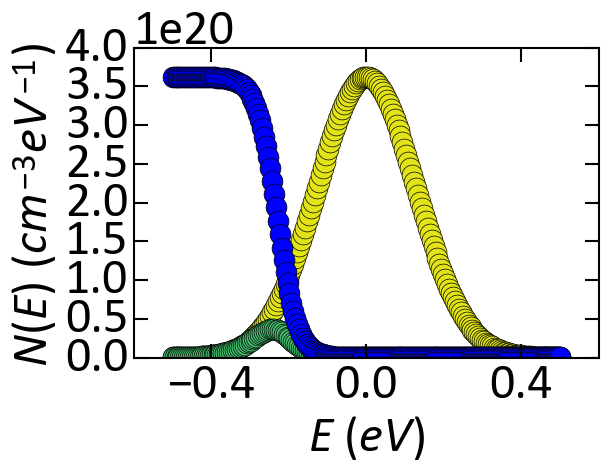

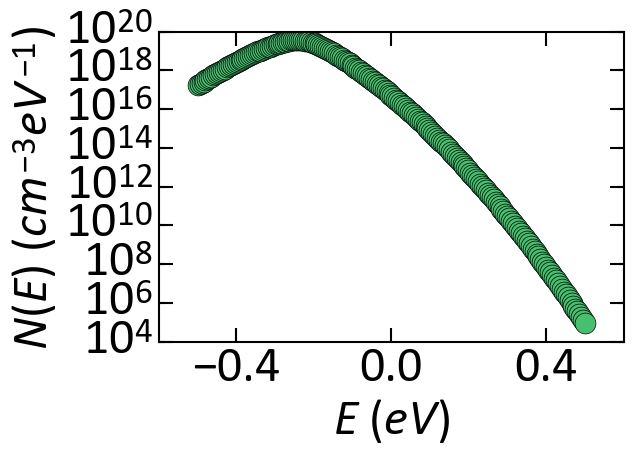

In [6]:
# plot the gaussian DOS for inspection
fig,ax = plt.subplots(1,1)
ax.plot(E,gaussDOS,'o',c = tuple(colSet[t]), markersize = 15)
ax.plot(E,fOverlap,'o',c = tuple(colSet[t-50]), markersize = 15)
ax.plot(E,amp*fermiArray[:,iMax-1],'o', markersize = 15)

ax.set_xlabel("$E$ ($eV$)")
ax.set_ylabel("$N(E)$ ($cm^{-3}eV^{-1}$) ")
# ax.set_xscale("log") 
# ax.set_yscale("log")
# ax.set_xlim([-.3,0.3])
# ax.set_ylim([-.1,1.1])
ax.xaxis.set_major_locator(MaxNLocator(4))

# plot just the overlap so that we can see the magnitude clearly
fig,ax = plt.subplots(1,1)
ax.plot(E,fOverlap,'o',c = tuple(colSet[t-50]), markersize = 15)
ax.set_xlabel("$E$ ($eV$)")
ax.set_ylabel("$N(E)$ ($cm^{-3}eV^{-1}$) ")
# ax.set_xscale("log") 
ax.set_yscale("log")
# ax.set_xlim([-.3,0.3])
# ax.set_ylim([-.1,1.1])
ax.xaxis.set_major_locator(MaxNLocator(4))




Below is some code for estimating the Debye Length of different DLCP values

In [7]:
epsilon = 11.5
epsilon0 = 8.854e-14
epsilon0_m = 8.854e-12

q = 1.602e-19
kBj = 1.38e-23

Na1 = 3e17
Na2 = 4e18

Na1m = 3e23
Na2m = 4e24

Tt = 280


Ld1 = np.sqrt( (epsilon*epsilon0_m*kBj*Tt)/((q**2)*Na1m))
Ld2 = np.sqrt( (epsilon*epsilon0_m*kBj*Tt)/((q**2)*Na2m))

print('The Debye length of the high frequency concentration at 280K is ~ {} m'.format(Ld1))
print('The Debye length of the low frequency concentration at 280K is ~ {} m'.format(Ld2))

print('The high frequency Debye length is ~{} times the low frequency Debye length at 280K'.format(Ld1/Ld2))


The Debye length of the high frequency concentration at 280K is ~ 7.148486457518476e-09 m
The Debye length of the low frequency concentration at 280K is ~ 1.9576936424015326e-09 m
The high frequency Debye length is ~3.651483716701107 times the low frequency Debye length at 280K


Try and relate our analysis on the overlap of the Fermi function and the valence band DOS to the optical data. First, import the optical data.

In [8]:
os.chdir(r'C:\Users\Eric\Desktop\Lab_Work\admittance\ligand_and_interface\analysis_work\EDT_schottky\09_2017_m1\data\opticalSupplement')

os.listdir()
nPoints = 801
masterOpt = np.zeros((3,nPoints,2))


# the tmp data has the following format:
#      index 0 is wavelength in nm
#      index 1 is absorption in arbitrary units
#      index 2 is normalized absorption



# import as made data into master array
file1 = 'PbS in solution-as made.csv'     
tmp1 = np.genfromtxt(file1,delimiter = ',')
masterOpt[0,:,0] = tmp1[2:,0]
masterOpt[1,:,0] = tmp1[2:,1]

# normalize the as made data by finding an index that cuts out the higher excitonic features and normalizng to max of this range
absIdx = np.where(masterOpt[0,:,0] <=920)[0][0]
asMade0 = max(masterOpt[1,:absIdx,0])
masterOpt[2,:,0] = masterOpt[1,:,0]/asMade0

# import EDT data into master array
file2 = 'PbS-EDT.csv'     
tmp2 = np.genfromtxt(file2,delimiter = ',')
masterOpt[0,:,1] = tmp2[2:,0]
masterOpt[1,:,1] = tmp2[2:,1]

# normalize EDT data
edt0 = max(masterOpt[1,:absIdx,1])
masterOpt[2,:,1] = masterOpt[1,:,1]/edt0
  
# asd   
def asMade(dummy):
    return masterOpt[2,:,0]

def edt(dummy):
    return masterOpt[2,:,1]

def waveLength(dummy):
    return masterOpt[0,:,0]

# indicate the figures directory
figDir = r'C:\Users\Eric\Desktop\Lab_Work\admittance\ligand_and_interface\analysis_work\EDT_schottky\09_2017_m1\analysis\figures\OpticalSupplemental'


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


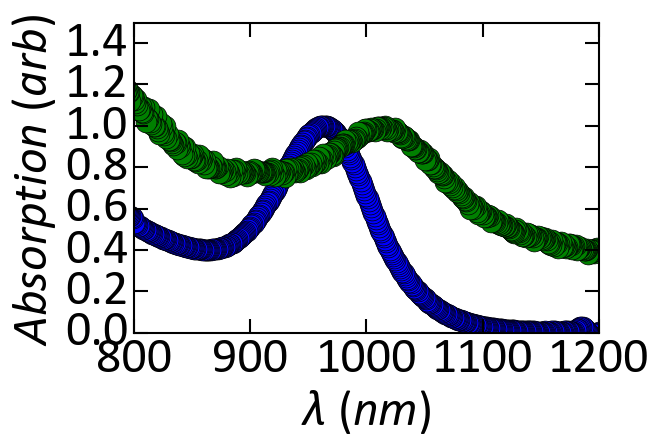

In [9]:
# plot the data to see what we are dealing with

fig,ax = plt.subplots(1,1)
ax.plot(waveLength(1),asMade(1),'o', markersize = 15)
ax.plot(waveLength(1),edt(1),'o', markersize = 15)
ax.set_xlabel("$\\lambda$ ($nm$)")
ax.set_ylabel("$Absorption$ ($arb$) ")
# ax.set_xscale("log") 
# ax.set_yscale("log")
ax.set_xlim([800,1200])
ax.set_ylim([0,1.5])
ax.xaxis.set_major_locator(MaxNLocator(4))

[[Model]]
    (Model(gaussian, prefix='g1_') + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 586
    # data points      = 280
    # variables        = 5
    chi-square         = 0.07215582
    reduced chi-square = 2.6238e-04
    Akaike info crit   = -2303.84076
    Bayesian info crit = -2285.66681
[[Variables]]
    exp_amplitude: -1.1567e+12 +/- 6.2673e+13 (5418.21%) (init = 9.057089e+09)
    exp_decay:      30.6912598 +/- 56.6333410 (184.53%) (init = 41.81957)
    g1_sigma:       47.5291106 +/- 1.97095654 (4.15%) (init = 30)
    g1_amplitude:   121.479730 +/- 19.3040917 (15.89%) (init = 1)
    g1_center:      957.441274 +/- 4.18835751 (0.44%) (init = 980)
    g1_fwhm:        111.922500 +/- 4.64124789 (4.15%) == '2.3548200*g1_sigma'
    g1_height:      1.01965726 +/- 0.12021780 (11.79%) == '0.3989423*g1_amplitude/max(1.e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.500)
    C(exp_amplitude, exp_decay)

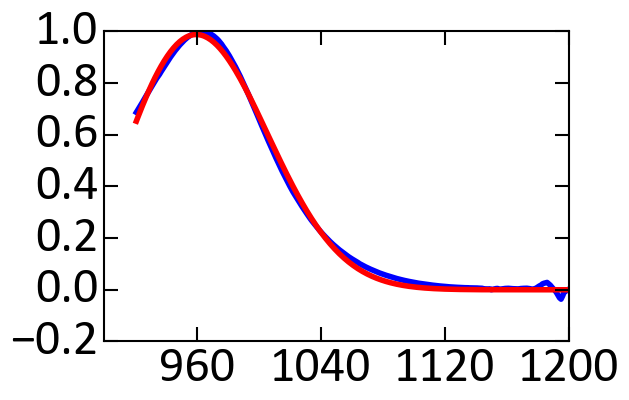

In [10]:
import lmfit as lmf
from lmfit.models import ExponentialModel, GaussianModel

x = waveLength(1)[:absIdx]

y1 = asMade(1)[:absIdx] 
y2 = edt(1)[:absIdx]

exp_mod = ExponentialModel(prefix='exp_')
pars1 = exp_mod.guess(y1, x=x)

gauss1 = GaussianModel(prefix='g1_')
pars1.update(gauss1.make_params())

pars1['g1_center'].set(980, min=950, max=1100)
pars1['g1_sigma'].set(30, min=3)
pars1['g1_amplitude'].set(1, min=0.1)

mod = gauss1 + exp_mod

init1 = mod.eval(pars1, x=x)

out1 = mod.fit(y1, pars1, x=x)
print(out1.fit_report(min_correl=0.5))

plot_components = False

fig,ax = plt.subplots(1,1)
ax.plot(x, y1, 'b')
# plt.plot(x, init, 'k--')
ax.plot(x, out1.best_fit, 'r-')
ax.xaxis.set_major_locator(MaxNLocator(4))

if plot_components:
    comps = out.eval_components(x=x)
    plt.plot(x, comps['g1_'], 'b--')
    plt.plot(x, comps['exp_'], 'k--')

plt.show()

[[Model]]
    (Model(gaussian, prefix='g1_') + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 140
    # data points      = 280
    # variables        = 5
    chi-square         = 0.02488637
    reduced chi-square = 9.0496e-05
    Akaike info crit   = -2601.90291
    Bayesian info crit = -2583.72896
[[Variables]]
    exp_amplitude:  5.73079384 +/- 0.14280484 (2.49%) (init = 24.61086)
    exp_decay:      449.579830 +/- 4.41362491 (0.98%) (init = 294.269)
    g1_sigma:       44.6319190 +/- 0.35358836 (0.79%) (init = 50)
    g1_amplitude:   43.0875226 +/- 0.51340058 (1.19%) (init = 1)
    g1_center:      1018.87852 +/- 0.27256901 (0.03%) (init = 950)
    g1_fwhm:        105.100136 +/- 0.83263695 (0.79%) == '2.3548200*g1_sigma'
    g1_height:      0.38513772 +/- 0.00220539 (0.57%) == '0.3989423*g1_amplitude/max(1.e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.500)
    C(exp_amplitude, exp_decay)    = -0.994

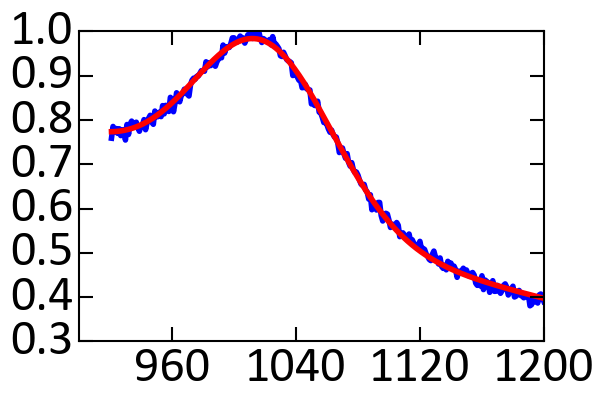

In [11]:
x = waveLength(1)[:absIdx]

y2 = edt(1)[:absIdx]

exp_mod = ExponentialModel(prefix='exp_')
pars2 = exp_mod.guess(y2, x=x)

gauss1 = GaussianModel(prefix='g1_')
pars2.update(gauss1.make_params())

pars2['g1_center'].set(950, min=880, max=1100)
pars2['g1_sigma'].set(50, min=3)
pars2['g1_amplitude'].set(1, min=0.1)

mod = gauss1 + exp_mod

init2 = mod.eval(pars2, x=x)

out2 = mod.fit(y2, pars2, x=x)
print(out2.fit_report(min_correl=0.5))

plot_components = True
fig,ax = plt.subplots(1,1)
ax.plot(x, y2, 'b')
# plt.plot(x, init, 'k--')
ax.plot(x, out2.best_fit, 'r-')
ax.xaxis.set_major_locator(MaxNLocator(4))
# figName = '\\fit_rough.png'
# plt.savefig(figDir + figName,dpi = 300,bbox_inches = 'tight')

# if plot_components:
comps = out2.eval_components(x=x)
#     plt.plot(x, comps['g1_'], 'b--')
#     plt.plot(x, comps['g2_'], 'b--')
#     plt.plot(x, comps['exp_'], 'k--')

plt.show()

Great; now that we have our fits, let's convert the FWHM, which is in nm, to eV. Recall that $\frac{1240 nm}{E} = E eV$.

In [12]:
print(type(out2.best_fit))
print(type(x))
print(type(y2))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


The calculated width of the haf the band tail is 0.141358463265028 eV
The calculated standard deviation (sigma) of our valence band DOS is 0.051074377299597185 eV


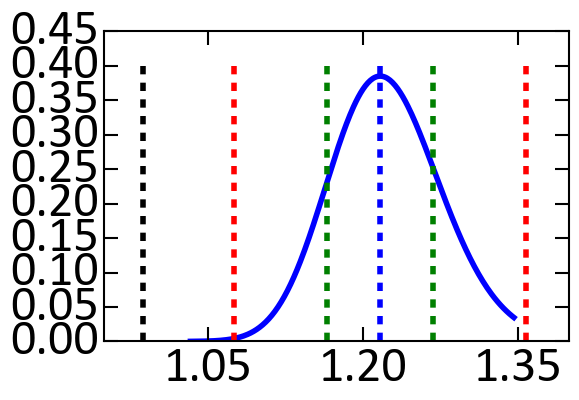

In [13]:
# try to visualize relevant parameters in energy instead of nm. calculate width sigma in eV

# factor for converting nm to eV
nm2ev = 1240

# make arrays out of relevant fit parameters
FWHM_nm = np.array([out2.params['g1_fwhm'].value,out2.params['g1_fwhm'].stderr])
center_nm = np.array([out2.params['g1_center'].value,out2.params['g1_center'].stderr])
sigma_nm = np.array([out2.params['g1_sigma'].value,out2.params['g1_sigma'].stderr])

# calculate the tail position E_{T}. Assume it's ~3 sigma from mean (E_{V})
bound_nm = center_nm[0] + 3*sigma_nm[0]
# print(bound_nm)
bound_ev = nm2ev/bound_nm
center_ev = nm2ev/center_nm[0]
# print(center_ev, bound_ev)
bandTail_ev = bound_ev - center_ev 
print('The calculated width of the haf the band tail is {} eV' .format(abs(bandTail_ev)))

# calculate standard deviation sigma in cm^-3eV^-1
sigmaDist_nm = center_nm[0] + sigma_nm[0]
# print(sigma1_nm)
sigmaDist_ev = nm2ev/sigmaDist_nm
# print(sigma1_ev)
sigmaVar = abs(sigmaDist_ev - center_ev)
print('The calculated standard deviation (sigma) of our valence band DOS is {} eV' .format(abs(sigmaVar)))

fig,ax = plt.subplots(1,1)
ax.plot(1240/x, comps['g1_'], 'b')
ax.plot([center_ev,center_ev],[0,.4],'b--')
ax.plot([center_ev + bandTail_ev, center_ev + bandTail_ev],[0,0.4],'r--')
ax.plot([center_ev - bandTail_ev, center_ev - bandTail_ev],[0,0.4],'r--')
ax.plot([center_ev+sigmaVar,center_ev+sigmaVar],[0,.4],'g--')
ax.plot([center_ev-sigmaVar,center_ev-sigmaVar],[0,.4],'g--')
ax.plot([center_ev-0.23, center_ev-0.23],[0,0.4],'k--')         
ax.xaxis.set_major_locator(MaxNLocator(4))



So it looks like, instead of the FWHM, the energy we seek correponds roughly to the $3\sigma$ point. This point corresponds to being outside the $\sim 99.73\%$ of the data. Meaning, the localized states are indeed between the onset of the valence bandtail and the cener of the distribution ($E_{V}$).

Now we need to redo our analysis from above, using the $\sigma$ parmeters obtained from the fit.

In [14]:
# calculate the total number of particles N_{QD}

# radius of QD in cm
rQD = 1.5e-7

# volume of single spherical QD
vQD = (4/3)*np.pi*(rQD**3)
# print(vQD)

# packing fraction eta = RCP packing fraction modified by volume ratio of QD/void spacing from Grinolds paper
chi = 0.64
QDspacing = 4e-7
vSpacing = (4/3)*np.pi*((QDspacing/2)**3)
eta = 0.74*(vQD/vSpacing)
print(eta)

# number of QDs per unit volume
nQD = (eta)/vQD
# nQD = (chi)/vQD

print('The number of QDs in the film is ~ {} cm^(-3)'.format(nQD))

nV = 8*nQD
print('The total concentration of valence band states is ~ {} cm^(-3)'.format(nV))

0.31218749999999995
The number of QDs in the film is ~ 2.2082748354000482e+19 cm^(-3)
The total concentration of valence band states is ~ 1.7666198683200386e+20 cm^(-3)


In [28]:
print(vQD)

1.4137166941154065e-20


## print(amp)

The total integrated DOS is: 1.0524286819752022e+18 cm^(-3)


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


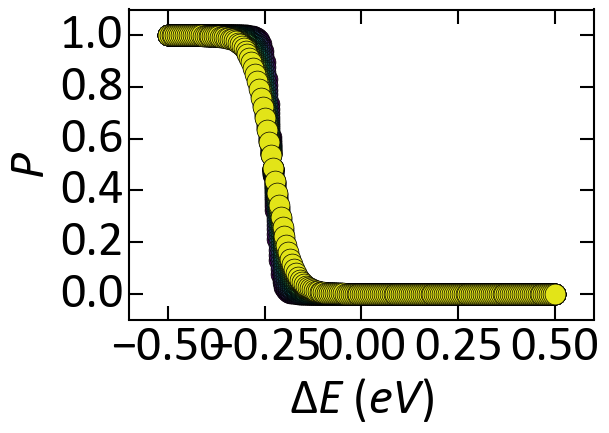

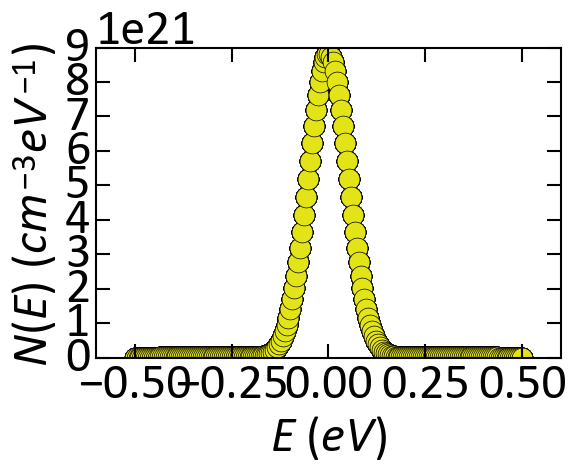

In [17]:
# array to store Fermi function at different E, T
fermiArray = np.zeros((200,200)) 
iMax = fermiArray.shape[0]

# energy ordinate
E = np.linspace(-.5,.5,iMax)

# temperature array
T = np.linspace(100,300,iMax)

# make colormap corresponding to full dat set
colSet = (cm.viridis(np.linspace(0,1,iMax)))

# input the energetic distance |E_{F} - E_{v}| = E_{A} of dielectric relaxation and find index
E_star = -0.23
starIdx = np.max(np.where(E <= E_star)[0])
# print(starIdx)

# calculate the Fermi funnction and plot
for e in range(0,iMax):
    for t in range(0,iMax):
        fermiArray[e,t] = 1/(1 + np.exp((E[e]-E_star)/(kB*T[t])))
        
fig,ax = plt.subplots(1,1)
for t in range(0,iMax,10):
    ax.plot(E,fermiArray[:,t],'o',c = tuple(colSet[t]), markersize = 15)
ax.set_xlabel("$\\Delta E$ ($eV$)")
ax.set_ylabel("$P$ ")
# ax.set_xscale("log") 
# ax.set_yscale("log")
# ax.set_xlim([-.3,0.3])
ax.set_ylim([-.1,1.1])
ax.xaxis.set_major_locator(MaxNLocator(6))


# calculate gaussian valence band DOS function (centered at Ev = 0). note the division by the single particle energetic width
# amp = (nV/(kB*300));
amp = (nV/.02);
# print(amp)

#calculate gaussian
gaussDOS = amp*np.exp(-(E)**2/(2*(sigmaVar**2)))
# print(gaussDOS)


# plot the gaussian DOS for inspection
fig,ax = plt.subplots(1,1)
for t in range(0,iMax,10):
    ax.plot(E,gaussDOS,'o',c = tuple(colSet[t]), markersize = 15)
# ax.plot([sigmaVar, sigmaVar], [0,5e20],'--')
# ax.plot([abs(E_star), abs(E_star)], [0,5e20],'--')
ax.set_xlabel("$E$ ($eV$)")
ax.set_ylabel("$N(E)$ ($cm^{-3}eV^{-1}$) ")
# ax.set_xscale("log") 
# ax.set_yscale("log")
# ax.set_xlim([-.3,0.3])
# ax.set_ylim([-.1,1.1])
ax.xaxis.set_major_locator(MaxNLocator(6))
# ax.yaxis.set_major_locator(MaxNLocator(10))
# figName = '\\gDOS_Ef_sigma.png'
# plt.savefig(figDir + figName,dpi = 300,bbox_inches = 'tight')

# integrate product of fermi function and DOS

def vDOS(energy,a,var):
    return a*np.exp(-(energy)**2/(2*var**2))

def fermi(energy,Ef,temp):
    return 1/(1 + np.exp((energy-Ef)/(kB*temp)))

def fProd(f1, f2):
    return f1*f2

def fIntegrand(energy,a,var,Ef,temp):
    return (a*np.exp(-(energy)**2/(2*var**2)))*(1/(1 + np.exp((energy-Ef)/(kB*temp))))

# # a = amp
# # energy = E
# # var = sigmaVar
f1 = vDOS(E,amp,sigmaVar)

# # Ef = E_star
# # temp = 300
f2 = fermi(E,E_star,300)

fOverlap = fProd(f1,f2)

I = quad(fIntegrand, E_star, np.inf, args = (amp,sigmaVar,E_star,300))

print('The total integrated DOS is: {} cm^(-3)'.format(I[0]))


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


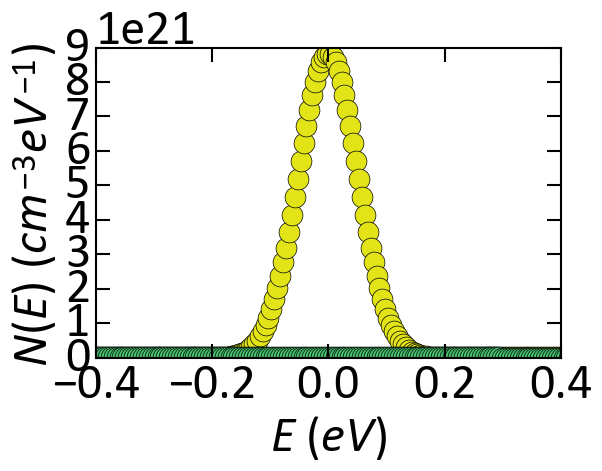

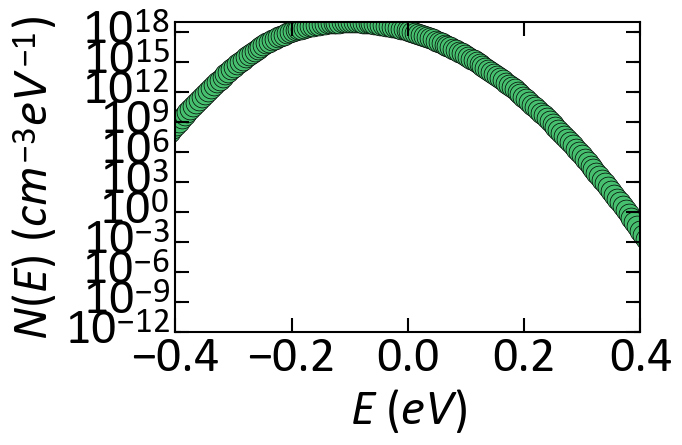

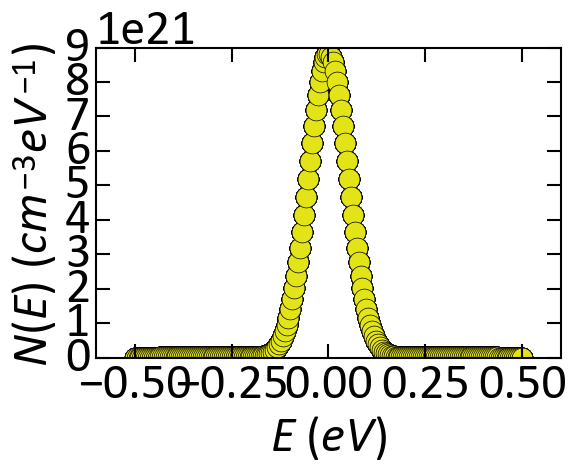

In [23]:
# plot the gaussian DOS for inspection
fig,ax = plt.subplots(1,1)
ax.plot(E,gaussDOS,'o',c = tuple(colSet[t]), markersize = 15)
ax.plot(E,fOverlap,'o',c = tuple(colSet[t-50]), markersize = 15)
# ax.plot(E,amp*fermiArray[:,iMax-1],'o', markersize = 15)
ax.set_xlabel("$E$ ($eV$)")
ax.set_ylabel("$N(E)$ ($cm^{-3}eV^{-1}$) ")
# ax.set_xscale("log") 
# ax.set_yscale("log")
ax.set_xlim([-.4,0.4])
# ax.set_ylim([-.1,1.1])
ax.xaxis.set_major_locator(MaxNLocator(4))
# figName = '\\gDOS_fermi_integral.png'
# plt.savefig(figDir + figName,dpi = 300,bbox_inches = 'tight')

# plot just the overlap so that we can see the magnitude clearly
fig,ax = plt.subplots(1,1)
ax.plot(E,fOverlap,'o',c = tuple(colSet[t-50]), markersize = 15)
ax.set_xlabel("$E$ ($eV$)")
ax.set_ylabel("$N(E)$ ($cm^{-3}eV^{-1}$) ")
# ax.set_xscale("log") 
ax.set_yscale("log")
ax.set_xlim([-.4,0.4])
# ax.set_ylim([-.1,1.1])
ax.xaxis.set_major_locator(MaxNLocator(4))
# figName = '\\gDOS_prodIntegral.png'
# plt.savefig(figDir + figName,dpi = 300,bbox_inches = 'tight')

# plot the gaussian DOS for inspection
fig,ax = plt.subplots(1,1)
for t in range(0,iMax,10):
    ax.plot(E,gaussDOS,'o',c = tuple(colSet[t]), markersize = 15)
# ax.plot([sigmaVar, sigmaVar], [0,5e20],'--')
# ax.plot([abs(E_star), abs(E_star)], [0,5e20],'--')
ax.set_xlabel("$E$ ($eV$)")
ax.set_ylabel("$N(E)$ ($cm^{-3}eV^{-1}$) ")
# ax.set_xscale("log") 
# ax.set_yscale("log")
# ax.set_xlim([-.3,0.3])
# ax.set_ylim([-.1,1.1])
ax.xaxis.set_major_locator(MaxNLocator(6))
# ax.yaxis.set_major_locator(MaxNLocator(10))
# figName = '\\gDOS_Ef_sigma.png'
# plt.savefig(figDir + figName,dpi = 300,bbox_inches = 'tight')

7.50398136808e+21


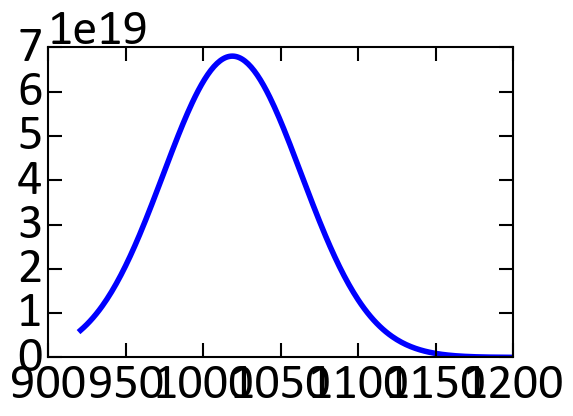

In [32]:
# print(comps['g1_'])
fig,ax = plt.subplots(1,1)
ax.plot(x,nV*comps['g1_'])
test =np.trapz(nV*comps['g1_'])
print(test)

C:\Users\Eric\Desktop\Lab_Work\admittance\ligand_and_interface\analysis_work\EDT_schottky\09_2017_m1\analysis\figures\OpticalSupplemental


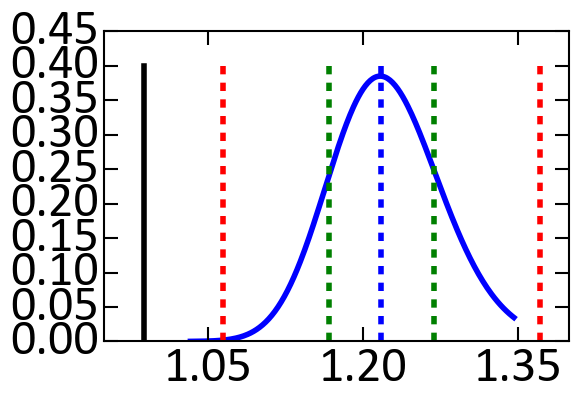

In [33]:
fig,ax = plt.subplots(1,1)
# ax.plot(1240/x, np.flipud(comps['g1_']), 'b--')

ax.plot(1240/x, comps['g1_'], 'b')

ax.plot([1240/1018,1240/1018],[0,.4],'b--')
ax.plot( [1240/1018 + sigmaVar,1240/1018 + sigmaVar], [0,.4], 'g--' )
ax.plot( [1240/1018 + (3*sigmaVar), 1240/1018 + (3*sigmaVar)], [0,.4], 'r--' )
ax.plot( [1240/1018 - sigmaVar,1240/1018 - sigmaVar], [0,.4], 'g--' )
ax.plot( [1240/1018 - (3*sigmaVar), 1240/1018 - (3*sigmaVar)], [0,.4], 'r--' )
ax.plot( [1240/1018 -(0.23), 1240/1018 - (.23)], [0,.4], 'k' )
# ax.plot([1018-105.1/2,1018+105.1/2],[0.19,0.19])
# ax.plot([1018 + 44.6,1018 + 44.6],[0,.4])
ax.xaxis.set_major_locator(MaxNLocator(4))
# figName = '\\fitParams_eV.png'
# plt.savefig(figDir + figName,dpi = 300,bbox_inches = 'tight')

# print(1018+3*44.6)

print(figDir)


In [26]:
# export all this shit to Matlab so that we can make all the figures look the same

import scipy.io

# save the results of the G-omega fits, including extracted C, tau, and R values with assoaciated error arrays
scipy.io.savemat('Abs_DOS', dict(pyAbsNorm = y2 ,pyLambda = x, absFit = out2.best_fit, eScale = E, DOScalc = gaussDOS, overlap = fOverlap, DOSamp = amp, fermiFunc = fermiArray[:,iMax-1],lambdaTot = masterOpt[0,:,0],absTot = masterOpt[2,:,1]))




In [27]:
print(os.getcwd())


C:\Users\Eric\Desktop\Lab_Work\admittance\ligand_and_interface\analysis_work\EDT_schottky\09_2017_m1\data\opticalSupplement
